<a href="https://colab.research.google.com/github/elolive/elolive/blob/master/LSTMTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [0]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

In [72]:
print(path_to_train_file)

/root/.keras/datasets/train.txt


In [0]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding ='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding = 'utf-8')


In [74]:
print(len(train_text))

6937271


In [75]:
print(train_text[0:1000])

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1
5912145	왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?	1
9008700	걍인피니트가짱이다.진짜짱이다♥	1
10217543	볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~	1
5957425	울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해	0
8628627	담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.	1
9864035	취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지	0
6852435	ㄱ냥 매번 긴장되고 재밋음ㅠㅠ	1
9143163	참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다	1
4891476	굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐	0
7465483	이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥	1
3989148	약탈자를 위한 변명, 이라. 저놈들은 착한놈

In [0]:
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y =  np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

In [77]:
print(train_Y.shape)

(150000, 1)


In [0]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()



In [79]:
train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]


sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [0]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in train_text_X]

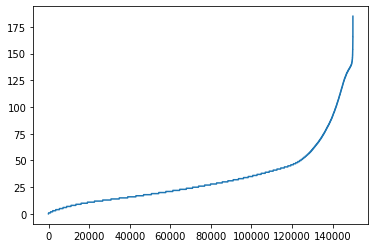

In [81]:
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

In [82]:
sentences[1][3]

'오버연기조차'

In [96]:
sentence_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])


for i in range(10):
  print(sentence_new[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
['막', '걸음마', '뗀', '3세부터', '초등학교', '1학년생인', '8살용영화', '별반개도', '아까움', '']
['원작의', '긴장감을', '제대로', '살려내지못', '']
['별', '반개도', '아깝다', '욕나온다', '이응경', '길용우', '연기생활이', '정말', '발로해도', '그것보단', '낫겟다', '납치', '감금만반복', '이드라마는', '가족도없다', '연기못하는']
['액션이', '없는데도', '재미', '있는', '몇안되는', '영화']
['왜케', '평점이', '낮은건데', '\\?', '꽤', '볼만한데', '헐리우드식', '화려함에만', '너무', '길들여져', '있나', '\\?', '']


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [0]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding = 'post')

In [102]:
print(train_X[:5])
print(train_X.shape)

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]
(150000, 25)


In [100]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.GRU(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
gru (GRU)                    (None, 50)                52800     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 6,052,902
Trainable params: 6,052,902
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)


Train on 120000 samples, validate on 30000 samples
Epoch 1/5
120000/120000 [==============================] - 62s 520us/sample - loss: 0.4921 - accuracy: 0.7207 - val_loss: 0.3772 - val_accuracy: 0.8211
Epoch 2/5
120000/120000 [==============================] - 60s 504us/sample - loss: 0.3187 - accuracy: 0.8527 - val_loss: 0.3781 - val_accuracy: 0.8257
Epoch 3/5
120000/120000 [==============================] - 61s 505us/sample - loss: 0.2548 - accuracy: 0.8796 - val_loss: 0.4219 - val_accuracy: 0.8185
Epoch 4/5
120000/120000 [==============================] - 61s 508us/sample - loss: 0.2052 - accuracy: 0.9012 - val_loss: 0.4943 - val_accuracy: 0.8081
Epoch 5/5
120000/120000 [==============================] - 61s 507us/sample - loss: 0.1667 - accuracy: 0.9176 - val_loss: 0.5955 - val_accuracy: 0.8042


In [109]:
print(train_X.shape)

(150000, 25)


In [110]:
print(train_Y.shape)

(150000, 1)


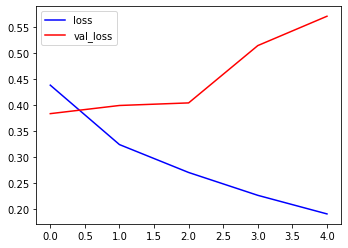

In [105]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label = 'loss')
plt.plot(history.history['val_loss'], 'r', label = 'val_loss')
plt.legend()




In [111]:
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]

sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []

for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding = 'post')

model.evaluate(test_X, test_Y, verbose = 1)

50000/50000 [==============================] - 5s 100us/sample - loss: 0.6062 - accuracy: 0.7984


[0.6061867030715943, 0.79844]

In [114]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ' )
print(test_sentence)

test_sentences = []

now_sentence = []
for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

print(test_sentences)

['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[['재미있을'], ['재미있을', '줄'], ['재미있을', '줄', '알았는데'], ['재미있을', '줄', '알았는데', '완전'], ['재미있을', '줄', '알았는데', '완전', '실망했다.'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이'], ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']]


In [116]:
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding = 'post', maxlen = 25)

prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print(prediction[idx])

['재미있을']
[0.46453747 0.53546256]
['재미있을', '줄']
[0.6290001  0.37099987]
['재미있을', '줄', '알았는데']
[0.6320136  0.36798635]
['재미있을', '줄', '알았는데', '완전']
[0.72389174 0.27610824]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.72389174 0.27610824]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.90012336 0.09987663]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9955389  0.00446112]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.99815434 0.00184563]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.99815434 0.00184563]


In [117]:
path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

62013440/62012502 [==============================] - 0s 0us/step


In [0]:
train_text = open(path_to_file, 'rb').read().decode(encoding = 'utf-8')

In [119]:
print(len(train_text))

26265493


In [122]:
print(train_text[:11])

﻿태조 이성계 선대의


In [0]:
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


In [0]:
train_text = train_text.split('\n')

In [127]:
print(train_text[:1])

['\ufeff태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 ']


In [128]:
x = 'this is  is this  koko'
a = x.split(' ')
b = x.split('   ')
print(a)
print(b)


['this', 'is', '', 'is', 'this', '', 'koko']
['this is  is this  koko']


In [0]:
train_text = [clean_str(sentence) for sentence in train_text]


In [132]:
train_text[:2]

a = []
a.extend(train_text[1].split(' '))
print(a)

['태조', '강헌', '지인', '계운', '성문', '신무', '대왕', '의', '성은', '이씨', '요', ',', '휘', '는', '단', '이요', ',', '자', '는', '군진', '이다', '그전의', '휘', '는', '이성계', '요', ',', '호', '는', '송헌', '이다', '전주', '의', '대성', '이다', '사공', '휘', '이한', '이', '신라', '에', '벼슬하여', '태종왕', '001', '의', '10대', '손자인', '군윤', '김은의', '의', '딸에게', '장가들어', '시중', '휘', '이자연', '을', '낳았다', '시중이', '복야', '휘', '이천상', '을', '낳고', ',', '복야가', '아간', '휘', '광희', '를', '낳고', ',', '아간이', '사도', '삼중', '대광', '휘', '입전', '을', '낳고', ',', '사도가', '휘', '이긍휴', '를', '낳고', ',', '이긍휴가', '휘', '염순', '을', '낳고', ',', '염순이', '휘', '이승삭', '을', '낳고', ',', '이승삭이', '휘', '충경', '을', '낳고', ',', '충경이', '휘', '경영', '을', '낳고', ',', '경영이', '휘', '충민', '을', '낳고', ',', '충민이', '휘', '화', '를', '낳고', ',', '화가', '휘', '진유', '를', '낳고', ',', '진유가', '휘', '궁진', '을', '낳고', ',', '궁진이', '대장군', '휘', '용부', '를', '낳고', ',', '대장군이', '내시', '집주', '002', '휘', '이인', '을', '낳고', ',', '집주가', '시중', '문극겸', '의', '딸에게', '장가들어', '장군', '양무', '를', '낳고', ',', '장군이', '상장군', '이강제', '의', '딸에게', '장가들어', '휘', '이안사', '를', '낳으니

In [133]:
train_text_X = []
for sentence in train_text:
  train_text_X.extend(sentence.split(' '))
  train_text_X.append('\n')


train_text_X = [word for word in train_text_X if  word != ""]
print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [134]:
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print("{} unique words".format(len(vocab)))

332640 unique words


In [0]:
word2idx = {u:i for i, u in enumerate(vocab)}
#print(word2idx.type)
idx2word = np.array(vocab)
